**Bài 1:** Cho phương trình f(x)= x^2, hãy sử dụng thuật toán gradient descent để tối ưu. Sau đó vẽ đồ thị hàm f(x) sau 10 lần cập nhật bước 2 với:
Lr = 0.2

Lr = 2

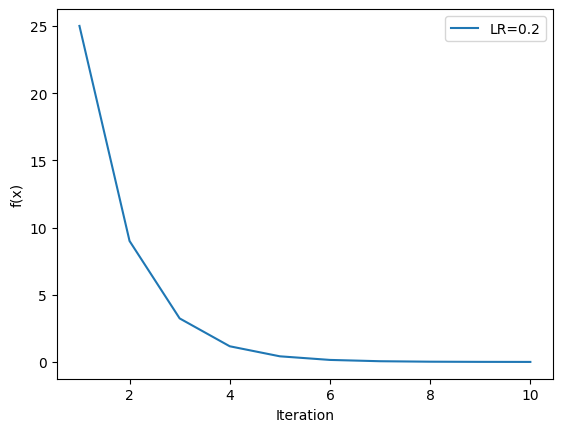

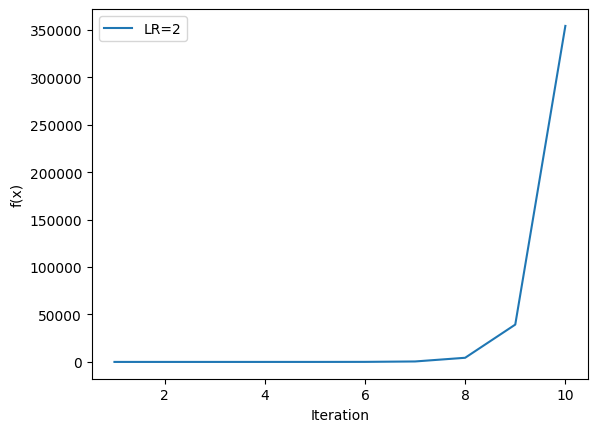

In [ ]:
import torch
import matplotlib.pyplot as plt

# Define the function f(x) = x^2
def f(x):
    return x ** 2

# Initialize the starting point
x = torch.tensor([5.0], requires_grad=True)

# Define the learning rates
learning_rates = [0.2, 2]

# Plot the graph for each learning rate separately
for lr in learning_rates:
    # Store the values of x and f(x) after each update
    x_list = []
    fx_list = []

    # Perform 10 iterations of gradient descent
    for _ in range(10):
        # Compute the function value and the derivative
        fx = f(x)
        fx.backward()

        # Update x using the learning rate
        with torch.no_grad():
            x -= lr * x.grad

        # Reset the gradients
        x.grad.zero_()

        # Append the current x and f(x) to the lists
        x_list.append(x.item())
        fx_list.append(fx.item())

    # Plot the graph for the current learning rate
    iterations = range(1, 11)
    plt.plot(iterations, fx_list, label=f'LR={lr}')

    plt.xlabel('Iteration')
    plt.ylabel('f(x)')
    plt.legend()

    # Show the plot
    plt.show()

**Bài 2:**
Cho dataset dự đoán giá nhà dựa vào diện tích (https://github.com/nttuan8/DL_Tutorial/blob/master/L1/data_linear.csv) Dựa vào code mẫu hãy
*   Implement thuật toán linear regression với dữ liệu trên
*   Chỉnh learning rate cho dữ liệu trên, chọn 1 learning rate lớn bị overshoot, 1 learning vừa, và 1 learning rate nhỏ. Với mỗi learning rate, vẽ đồ thị loss tương ứng
*   Chia tập train/test tỉ lệ 80/20, tính các chỉ số MSE, RSME, MAE, MAPE trên tập test





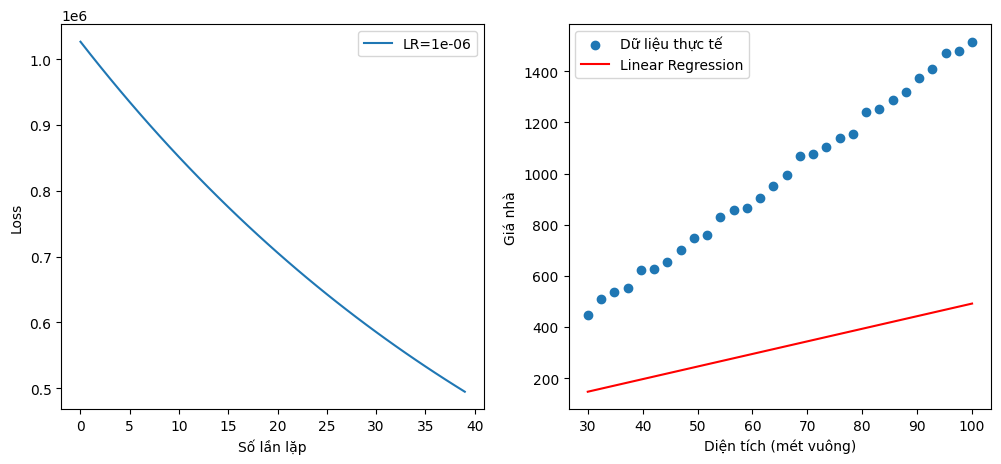

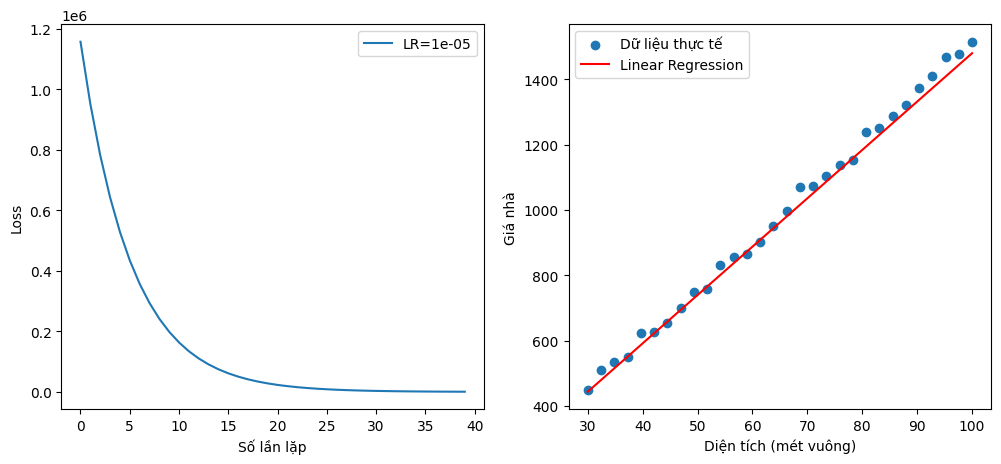

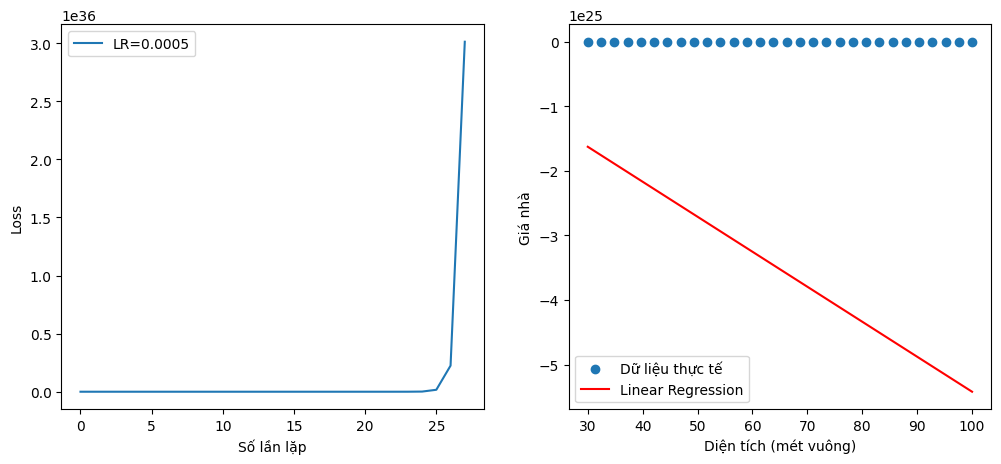

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import torch

# Đọc dữ liệu từ tệp CSV
data = pd.read_csv('https://raw.githubusercontent.com/nttuan8/DL_Tutorial/master/L1/data_linear.csv').values
x = data[:, 0].reshape(-1, 1)
y = data[:, 1].reshape(-1, 1)

# Chuyển dữ liệu thành tensor
x_tensor = torch.tensor(x, dtype=torch.float32)
y_tensor = torch.tensor(y, dtype=torch.float32)

# Tạo mảng các learning rate: nhỏ, vừa, overshoot
#learning_rates = [0.00001, 0.0001, 0.01]
learning_rates = [0.000001, 0.00001, 0.0005]
#learning_rates = [0.01, 1.1, 2]
# Lặp qua từng learning rate và vẽ biểu đồ loss
for lr in learning_rates:
    # Khởi tạo mô hình Linear Regression bằng PyTorch
    model = torch.nn.Linear(1, 1)
    criterion = torch.nn.MSELoss()
    optimizer = torch.optim.SGD(model.parameters(), lr=lr)

    # Tạo mảng để lưu giá trị loss
    losses = []

    # Huấn luyện mô hình
    num_epochs = 40
    for epoch in range(num_epochs):
        optimizer.zero_grad()
        outputs = model(x_tensor)
        loss = criterion(outputs, y_tensor)
        loss.backward()
        optimizer.step()
        losses.append(loss.item())

    # Vẽ đồ thị loss
    plt.figure(figsize=(12, 5))
    plt.subplot(1, 2, 1)
    plt.plot(losses, label=f'LR={lr}')
    plt.xlabel('Số lần lặp')
    plt.ylabel('Loss')
    plt.legend()

    # Vẽ biểu đồ linear regression dạng scatter plot
    plt.subplot(1, 2, 2)
    plt.scatter(x, y, label='Dữ liệu thực tế')
    with torch.no_grad():
        y_pred = model(x_tensor)
    plt.plot(x, y_pred, 'r', label='Linear Regression')
    plt.xlabel('Diện tích (mét vuông)')
    plt.ylabel('Giá nhà')
    plt.legend()

    plt.show()


#**Lr = 0.000001 (learning rate nhỏ)**

#**Lr = 0.00001 (learning rate vừa)**

#**Lr = 0.0005 (learning rate lớn bị overshoot)**

In [ ]:
# Chia tập train/test tỉ lệ 80/20
lr = 0.000001
split_ratio = 0.8
split_index = int(len(x) * split_ratio)
x_test = x_tensor[split_index:]
y_test = y_tensor[split_index:]
# Đánh giá mô hình trên tập test
model.eval()
with torch.no_grad():
    y_pred_test = model(x_test)
    mse = criterion(y_pred_test, y_test)
    rmse = torch.sqrt(mse)
    mae = torch.mean(torch.abs(y_pred_test - y_test))
    mape = torch.mean(torch.abs((y_test - y_pred_test) / y_test)) * 100
print(f'Learning Rate = {lr}')
print(f'MSE trên tập test: {mse.item()}')
print(f'RMSE trên tập test: {rmse.item()}')
print(f'MAE trên tập test: {mae.item()}')
print(f'MAPE trên tập test: {mape.item()}%\n')

Learning Rate = 1e-06
MSE trên tập test: 974524.75
RMSE trên tập test: 987.18017578125
MAE trên tập test: 986.0322265625
MAPE trên tập test: 69.03607177734375%

